In [1]:
#data imports
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import numpy as np

#pre processing imports
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [78]:
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [73]:
##metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Classification Model

## Data Analysis

In [4]:
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
# data (as pandas dataframes) 
df_x = rice_cammeo_and_osmancik.data.features 
df_y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
#print(rice_cammeo_and_osmancik.metadata)  
# variable information 
#print(rice_cammeo_and_osmancik.variables) 

In [5]:
df = df_x.copy()
df['Class'] = df_y
df.head()

Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent   Class  
0        15617  0.572896  Cammeo  
1        15072  0.615436  Cammeo  
2        14954  0.693259  Cammeo  
3        13368  0.640669  Cammeo  
4        15262  0.646024  Cammeo

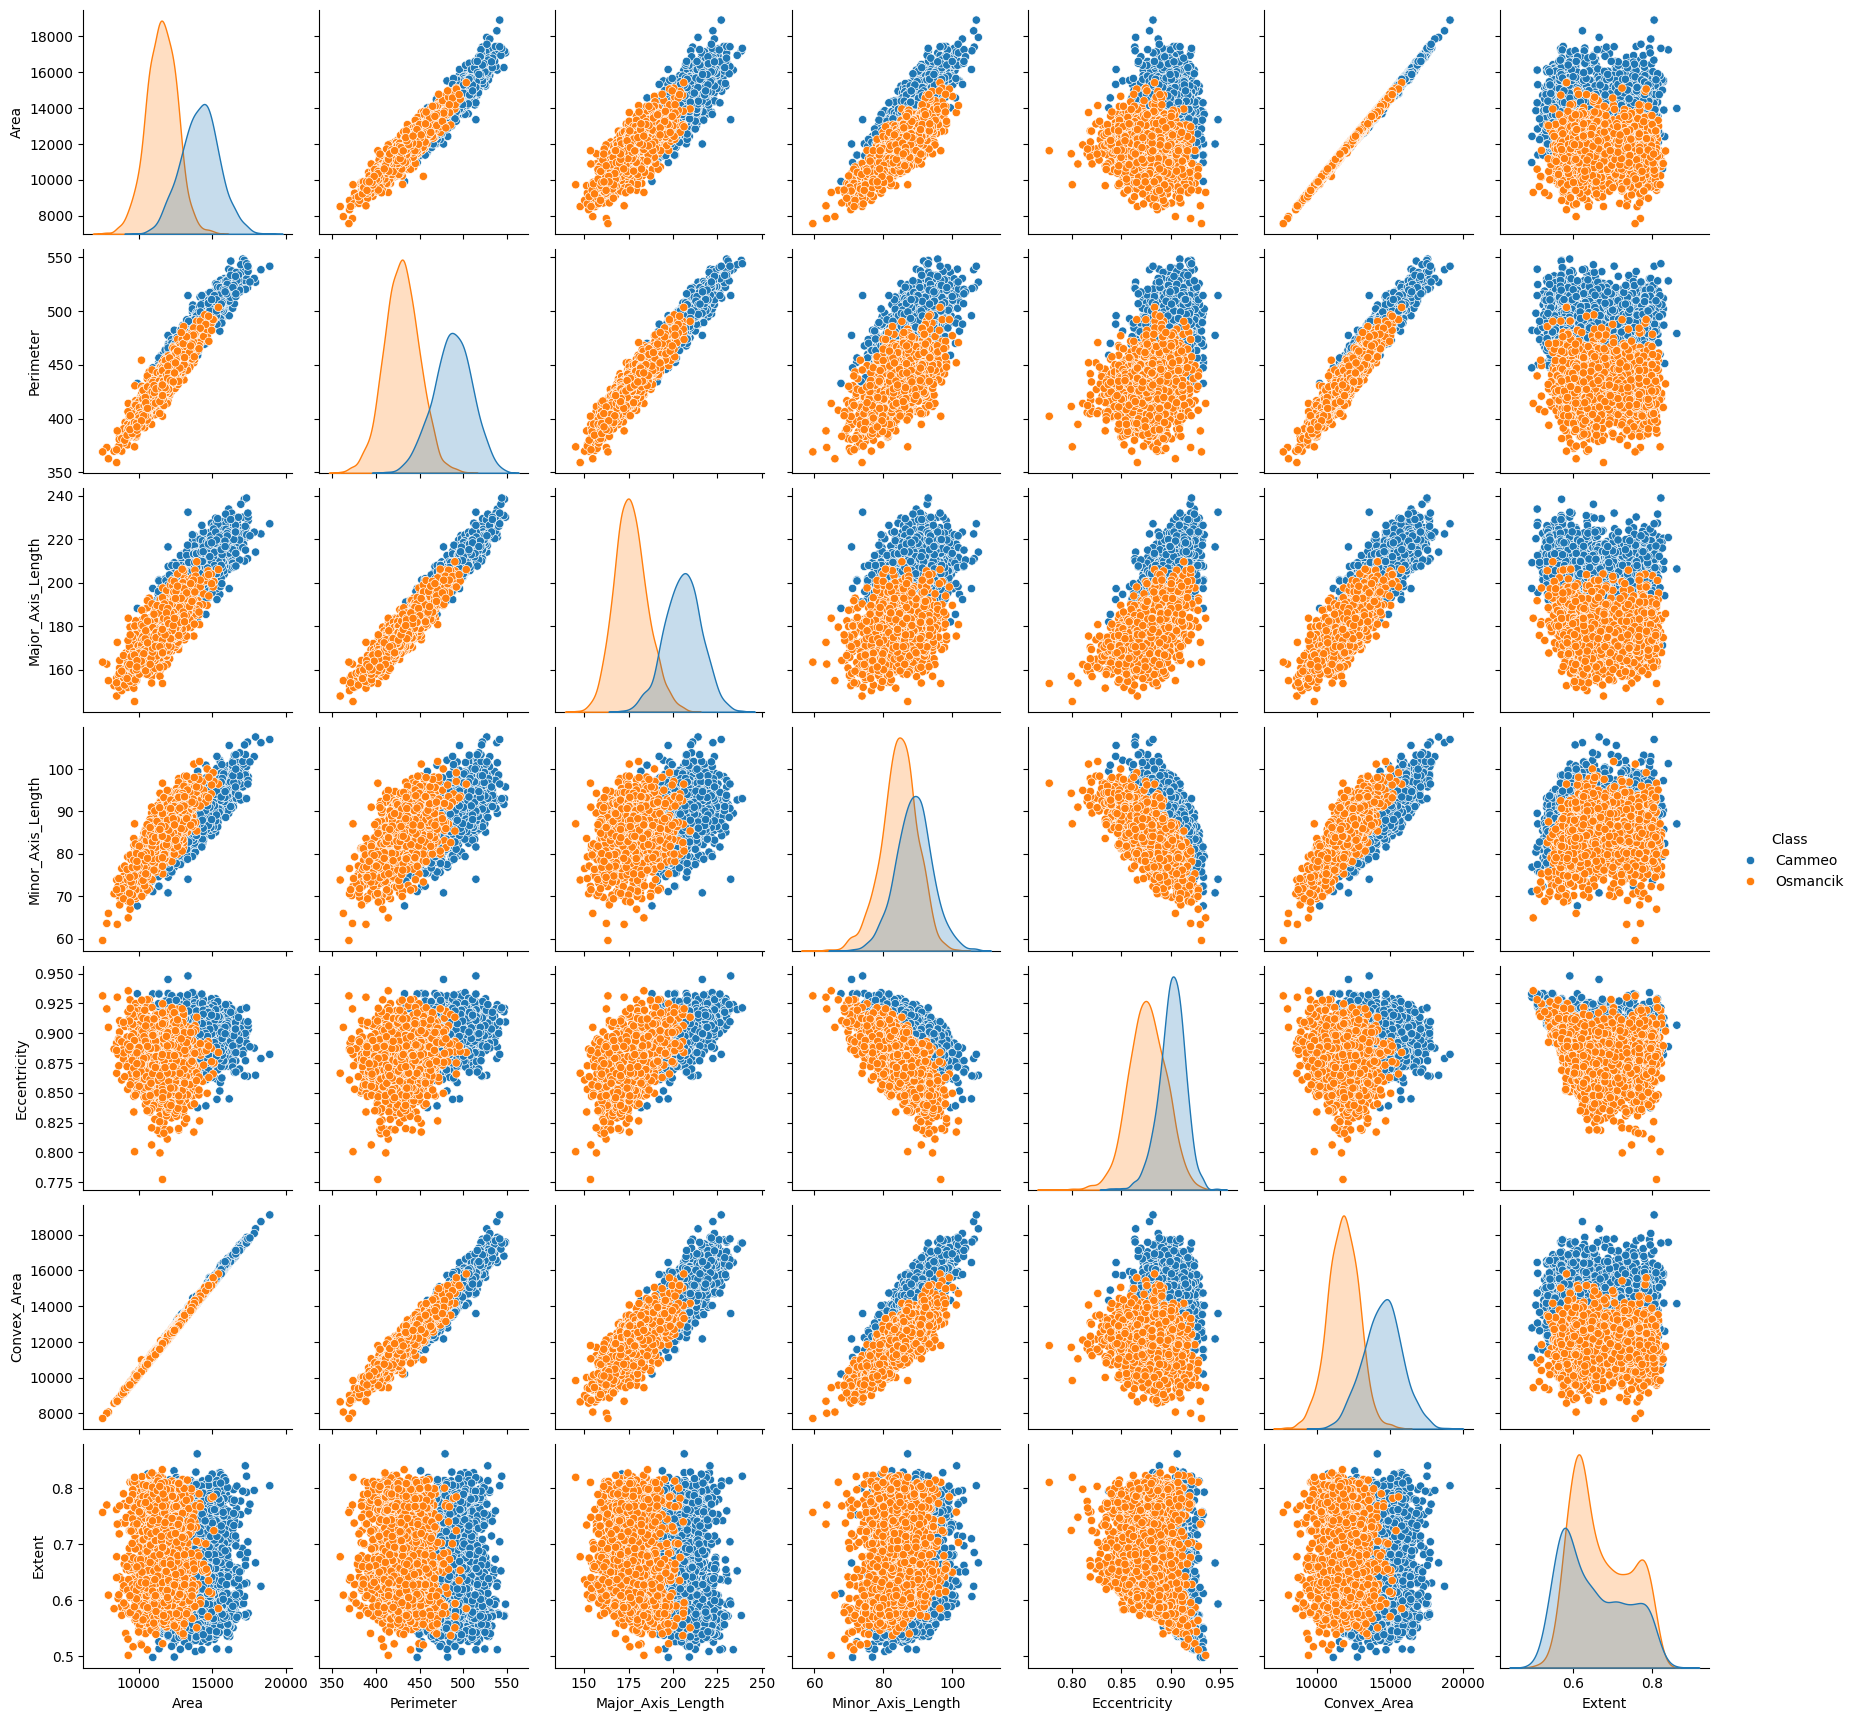

In [6]:
sns.pairplot(df, hue='Class')

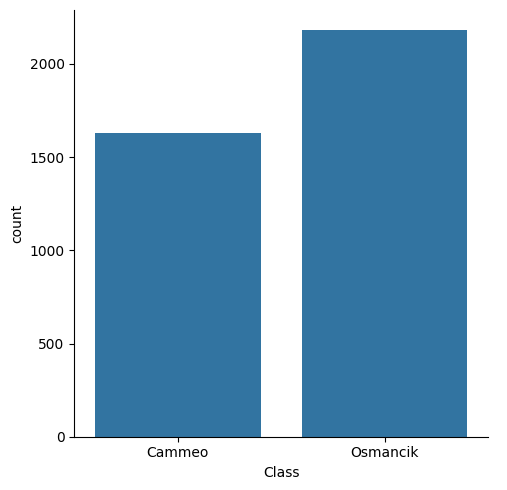

In [7]:
sns.catplot(data=df, x='Class', kind='count');

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


## Data Preparation

In [9]:
l_encoder = LabelEncoder()
X = normalize(df_x)
y = l_encoder.fit_transform(df_y)

c:\Users\I857413\Desktop\TechSkills\fiap-classification-model\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=SEED)

In [11]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Models Initial

### SVC

In [12]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
f1_score = f1_score(y_test, svc_y_pred, zero_division=0, average=None)
precision_score = precision_score(y_test, svc_y_pred)
recall_score = recall_score(y_test, svc_y_pred)
print(svc_accuracy)
print(f1_score)
print(precision_score)
print(recall_score)

0.5468066491688539
[0.         0.70701357]
0.5468066491688539
1.0


### KNN

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(knn_accuracy)


0.9046369203849519


### Decision Tree Classifier

In [14]:
treeClassifier = DecisionTreeClassifier(max_depth=7)
treeClassifier.fit(X_train, y_train)
treeClassifier_y_pred = treeClassifier.predict(X_test)
treeClassifier_accuracy = accuracy_score(y_test, treeClassifier_y_pred)
print(treeClassifier_accuracy)

0.905511811023622


### Randon Forest Classifier

In [15]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
random_forest_classifier_y_pred = random_forest_classifier.predict(X_test)
random_forest_classifier_accuracy = accuracy_score(y_test, random_forest_classifier_y_pred)
print(random_forest_classifier_accuracy)

0.9273840769903762


### Adaboost

In [16]:
ada = AdaBoostClassifier(estimator=treeClassifier, algorithm='SAMME')
ada.fit(X_train, y_train)
adar_y_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, adar_y_pred)
print(ada_accuracy)

0.9203849518810149


### Perceptron

In [17]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
perceptron_y_pred = perceptron.predict(X_test)
perceptron_accuracy = accuracy_score(y_test, perceptron_y_pred)
print(perceptron_accuracy)

0.905511811023622


## Models Improvement - Cross-Validation

Will follow with:

1 - AdaBoostClassifier - ada

2 - RandomForestClassifier - random_forest_classifier

3 - DecisionTreeClassifier - treeClassifier

4 - KNeighborsClassifier - knn

5 - Perceptron - perceptron

SVC performed way below the others so won't spend effort in fine tunning for now


In [18]:
# Since my dataset is not balanced I decided to use stractified kfold
def run_cross_validation(k=5, model=None, X=None, y=None):
    k = k
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=SEED)
    mape_scores = []
    accuracy_scores = []
    # Realizando o K-Fold Cross-Validation
    for train_index, val_index in kf.split(X, y):
        x_train, x_test = X[train_index], X[val_index]
        y_train, y_test = y[train_index], y[val_index]
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        mape_scores.append(mape)
        accuracy_scores.append(accuracy)
    return(mape_scores, accuracy_scores)

### Ada with Cross-Validation

In [19]:
ada_mape_list, ada_accuracy_list = run_cross_validation(model=ada, X=X, y=y)
print(f'Mean MAPE: {np.mean(ada_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(ada_accuracy_list),4)}')

Mean MAPE: 172578883358554.47
Mean Accuracy: 0.9244


### Random Forest with Cross-Validation

In [20]:
rf_mape_list, rf_accuracy_list = run_cross_validation(model=random_forest_classifier, X=X, y=y)
print(f'Mean MAPE: {np.mean(rf_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(rf_accuracy_list),4)}')

Mean MAPE: 161940459041931.25
Mean Accuracy: 0.9294


### KNN with Cross-Validation

In [21]:
knn_mape_list, knn_accuracy_list = run_cross_validation(model=knn, X=X, y=y)
print(f'Mean MAPE: {np.mean(knn_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(knn_accuracy_list),4)}')

Mean MAPE: 209222344893590.0
Mean Accuracy: 0.9129


### Decision Tree with Cross-Validation

In [22]:
tree_mape_list, tree_accuracy_list = run_cross_validation(model=treeClassifier, X=X, y=y)
print(f'Mean MAPE: {np.mean(tree_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(tree_accuracy_list),4)}')

Mean MAPE: 193855731991800.9
Mean Accuracy: 0.9207


### KNN with Cross-Validation

In [23]:
knn_mape_list, knn_accuracy_list = run_cross_validation(model=knn, X=X, y=y)
print(f'Mean MAPE: {np.mean(knn_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(knn_accuracy_list),4)}')

Mean MAPE: 209222344893590.0
Mean Accuracy: 0.9129


### Perceptron with Cross-Validation

In [24]:
perc_mape_list, perc_accuracy_list = run_cross_validation(model=perceptron, X=X, y=y)
print(f'Mean MAPE: {np.mean(perc_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(perc_accuracy_list),4)}')

Mean MAPE: 521282791514537.7
Mean Accuracy: 0.8268


## Models Improvement - Search CVs

In [25]:
def run_grid_search_cv(model, params, X, y):
    search_cv = GridSearchCV(model, params)
    search_cv.fit(X, y)
    return search_cv.best_estimator_

### Ada Grid Search CV

In [26]:
#X_train, X_test, y_train, y_test
params_ada = {
    'estimator': [treeClassifier],
    'n_estimators': [150, 100, 50],
    'learning_rate':[0.25, 0.50, 1.0],
    'algorithm': ['SAMME'],
    'random_state': [SEED]
}
model = AdaBoostClassifier()
ada_best = run_grid_search_cv(model=model, params=params_ada, X=X_train, y=y_train)

#### Running cross val in best model:

In [27]:
ada_mape_list, ada_accuracy_list = run_cross_validation(model=ada_best, X=X, y=y)
print(f'Mean MAPE: {np.mean(ada_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(ada_accuracy_list),4)}')

Mean MAPE: 173760930504845.94
Mean Accuracy: 0.9226


#### Running without cross val in bast model

In [28]:
adar_y_pred = ada_best.predict(X_test)
ada_accuracy = accuracy_score(y_test, adar_y_pred)
ada_mape = mean_absolute_percentage_error(y_test, adar_y_pred)
print(ada_accuracy)
print(ada_mape)

0.989501312335958
19700785771524.49


### Random Forest Grid SearchCV

In [29]:
rf_params = {
    'n_estimators':[100, 125, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 9]
}
model = RandomForestClassifier()
rf_best = run_grid_search_cv(model=model, params=rf_params, X=X_train, y=y_train)

#### Running cross val in best model:

In [30]:
rf_mape_list, rf_accuracy_list = run_cross_validation(model=rf_best, X=X, y=y)
print(f'Mean MAPE: {np.mean(rf_mape_list)}')
print(f'Mean Accuracy: {round(np.mean(rf_accuracy_list),4)}')

Mean MAPE: 171396836212263.0
Mean Accuracy: 0.931


#### Running without cross val in bast model

In [31]:
rf_best_y_pred = rf_best.predict(X_test)
rf_best_accuracy = accuracy_score(y_test, rf_best_y_pred)
print(rf_best_accuracy)

0.9413823272090989


# Regression Models

## Data Analysis

In [32]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# # metadata 
# print(wine_quality.metadata) 
  
# # variable information 
# print(wine_quality.variables) 


In [37]:
wine_df = X.copy()
wine_df['quality'] = y
wine_df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [43]:
print(np.sort(pd.unique(wine_df['quality'])))

[3 4 5 6 7 8 9]


### Pairplot Review

Based on the plot below and forther more the corr function I cannot observe any strong correlation to justify a linear regression

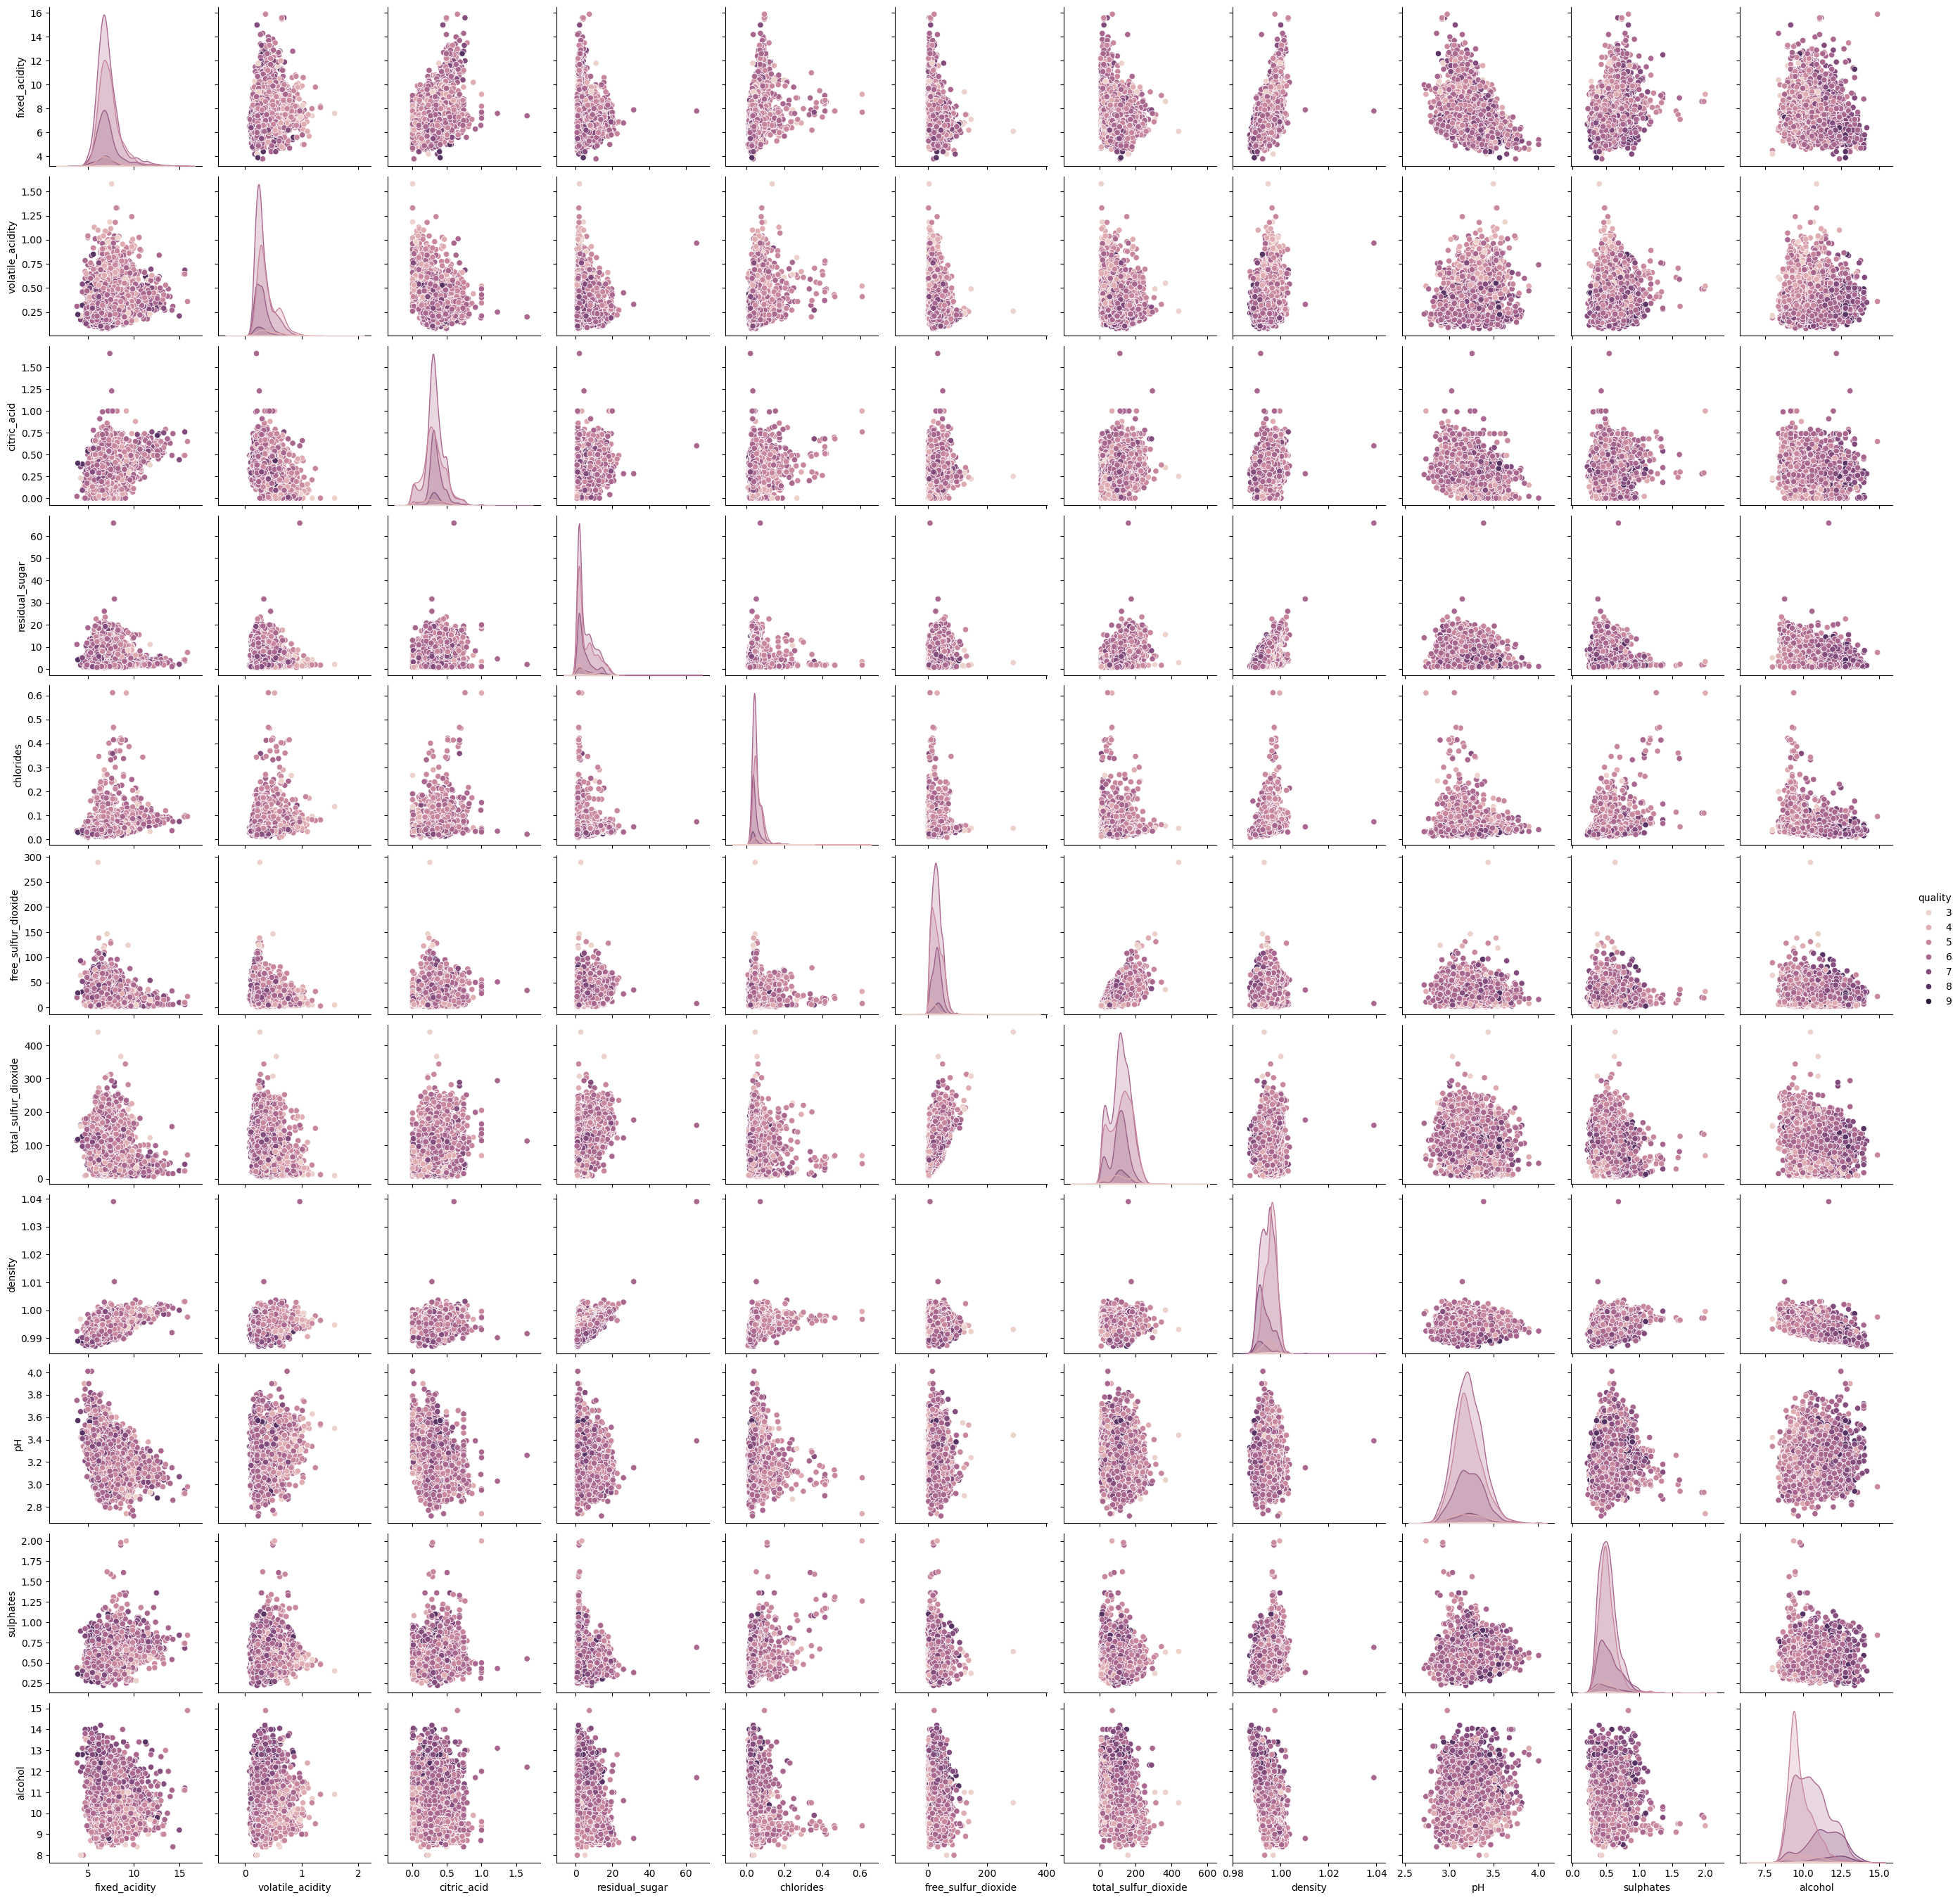

In [40]:
sns.pairplot(wine_df, hue='quality')

In [44]:
wine_df.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             1.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed_acidity        -0.095452 -0.076743  
volatile_acidity     -0.037640 -0.265699  
citric_acid          -0.010493  0.085532  
residual_sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free_sulfur_dioxide  -0.179838  0.055463  
total_sulfur_dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

In [45]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


### Catplot Review

Based on the catplot below I can see that I have very few data on categories 3, 4, 8 and 9.

Firstly the distributions of the data in the categories suggests a normal distribution.

Secondly that considering that most of my data is in cat 5, 6 and 7 I'll foccus on a multiclass logistic regression

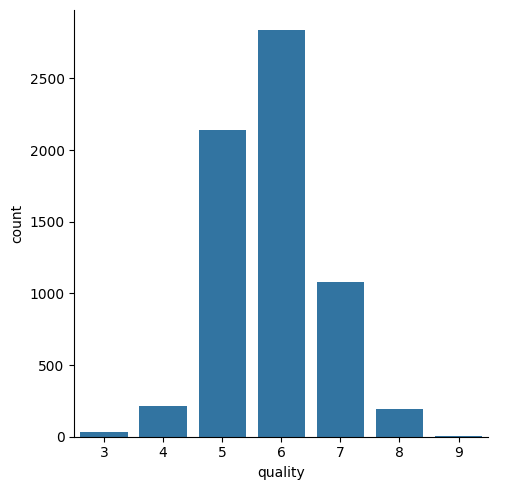

In [46]:
sns.catplot(data=wine_df, x='quality', kind='count');

In [49]:
wine_df_5_6_7 = wine_df.loc[wine_df['quality'].isin([5, 6, 7])]
wine_df_5_6_7.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [50]:
print(np.sort(pd.unique(wine_df_5_6_7['quality'])))

[5 6 7]


## Data preparation

In [59]:
X_5_6_7 = wine_df_5_6_7.drop(columns=['quality'])
y1 = wine_df_5_6_7['quality']

In [60]:
type(y1.head())

pandas.core.series.Series

In [61]:
X1 = normalize(X_5_6_7)
y1 = y1.to_numpy(dtype=int)

In [62]:
print(type(y1))

<class 'numpy.ndarray'>


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.30, random_state=SEED)

### Logistic Regression

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred =  logreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(mae)
print(rmse)

0.5159691629955947
0.5258810572687225


### Linear Regression

In [75]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred =  linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(mae)
print(rmse)

0.530695035698843
0.41756550784657465


### Perceptron

In [77]:
percreg = Perceptron()
percreg.fit(X_train, y_train)
y_pred = percreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(mae)
print(rmse)

0.5242290748898678
0.5242290748898678


### KNN Regressor

In [79]:
knnReg = KNeighborsRegressor()
knnReg.fit(X_train, y_train)
y_pred = knnReg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(mae)
print(rmse)

0.5341409691629956
0.43863436123348015


### Decision Tree Regressor

In [80]:
decRec = DecisionTreeRegressor()
decRec.fit(X_train, y_train)
y_pred = decRec.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(mae)
print(rmse)

0.42400881057268724
0.5055066079295154
